In [0]:
!curl -s http://whatismyip.akamai.com/
!pip install seaborn
!pip install powerlaw

35.230.9.146Requirement already satisfied: seaborn in /usr/local/lib/python3.6/dist-packages (0.7.1)


In [0]:
import pandas as pd
import powerlaw
import matplotlib.pyplot as plt
import seaborn
#from scipy.stats import powerlaw

In [0]:
#@title

#g.V().hasLabel('law').group().by().by(inE('refer').count())
case_ref_count = {
    "파산법": 139,
    "육운진흥법": 10,
    "농협협동조합법": 1,
    "고령화사회기본법": 0,
    "한국수자원공사법": 5,
    "농지개혁사업에관한특별조치법": 1,
    "소비자기본법": 3,
    "농어촌등보건의료를위한특별조치법": 4,
    "조징발재산정리에관한특별조치법": 1,
    "부패방지법": 8,
    "원자력법": 5,
    "경찰관직무집행법": 59,
    "한국토지개발공사법": 3,
    "현상기타사행행위단속법": 13,
    "최저임금법": 8,
    "지적법": 168,
    "민주화운동등에관한특별법": 2,
    "교통사고처리특례법": 142,
    "정부투자기관예산회계법": 2,
    "국세기본법": 1220,
    "사업법": 30,
    "파견근로자보호법": 1,
    "관광사업진흥법": 1,
    "유료도로법": 9,
    "농지담보법": 5,
    "긴급통화조치법": 1,
    "자동차운전사업법": 1,
    "단기금융업법": 14,
    "토지구획정이사업법": 2,
    "철도산업발전기본법": 9,
    "호적법": 130,
    "병역법": 158,
    "염전매법": 0,
    "토지법": 1,
    "운용업법": 41,
    "유기장법": 5,
    "과세법": 0,
    "해상운송사업법": 7,
    "현행특허법": 1,
    "진흥법": 5,
    "주세법": 35,
    "공공자금관리기금법": 1,
    "우편물운송법": 1,
    "귀속재산법": 0,
    "법인세법시행법": 1,
    "개정전도시계획법": 1,
    "기술용역육성법": 3,
    "농어촌소득원개발촉진법": 1,
    "지원법": 2,
    "전당포영업법": 1,
    "항공법": 23,
    "수복지역내소유자미복구임야의복구등록과보존등기에관한특별조치법": 2,
    "구특허법": 1,
    "독서진흥법": 1,
    "지방세기본법": 34,
    "한국산업인력공단법": 2,
    "조상속세법": 1,
    "금융지주회사법": 2,
    "군사원호대상자임용법": 0,
    "농지개량조합육성에관한특별조치법": 0,
    "항헌법재판소법": 1,
    "중소기업제품구매촉진법": 1,
    "컴퓨터프로그램보호법": 25,
    "구재정법": 1,
    "비송사건절차법": 76,
    "지방세특례제한법": 51,
    "조선광업법": 0,
    "화의법": 39,
    "학교보건법": 30,
    "조상법": 1,
    "벌금등임시조치법": 4,
    "가축전염병예방법": 2,
    "보조금관리법": 5,
    "정당법": 32,
    "농수산물도매시장법": 2,
    "사관학교설치법": 5,
    "예금자보호법": 19,
    "사방사업법": 1,
    "대도시권광역교통관리에관한특별법": 1,
    "정부조직법": 32,
    "구상법": 13,
    "농약관리법": 4,
    "특정범죄가중처벌등에관한법": 0,
    "실외광고물등관리법": 1,
    "벤처기업육성에관한특별조치법": 3,
    "교통안전진흥공단법": 1,
    "감사원법": 31,
    "정신보건법": 19,
    "영업세법": 32,
    "구상표법": 0,
    "발명보호법": 2,
    "광업권법": 1,
    "기업구조조정촉진법": 3,
    "법원재난에기인한민형사사건임시조치법": 0,
    "환경범죄의처벌에관한특별조치법": 1,
    "구심계원법": 1,
    "한국가스공사법": 4,
    "특수교육법": 1,
    "임야소유권이전등기등에관한특별조치법": 46,
    "지방세무관청설치법": 0,
    "자연공원법": 35,
    "물류정책기본법": 3,
    "석유사업법": 60,
    "중기사업법": 1,
    "교통시설경비교도대설치법": 1,
    "보호관찰법": 4,
    "여객자동차운수사업법": 34,
    "사면법": 22,
    "정치활동정화법": 1,
    "담배전매법": 0,
    "어업자원보호법": 2,
    "국민연금기금법": 1,
    "통신비밀보호법": 38,
    "즉결심판에관한절차법": 9,
    "임대주택건설촉진법": 8,
    "신용카드업법": 17,
    "국유재산처리법": 0,
    "주택임대차보험법": 1,
    "온천법": 13,
    "습관성의약품관리법": 11,
    "열관리법": 2,
    "외자관리법": 5,
    "이용사및미용사법": 2,
    "의료법": 324,
    "고압가스안전관리법": 2,
    "항국세기본법": 0,
    "호법무사법": 1,
    "도시구획정리사업법": 0,
    "공직선거법": 240,
    "등록세법": 7,
    "군인사법": 55,
    "공유수면매립법": 94,
    "공증인법": 30,
    "지방재정법": 112,
    "수산업발전특별법": 1,
    "특별조치세법": 0,
    "대학원졸업생등의병역특례에관한특별조치법": 2,
    "내수면어업법": 4,
    "사회안전법": 8,
    "부담금관리기본법": 1,
    "도시재개발법": 163,
    "산지관리법": 31,
    "국토이용관리법": 287,
    "문교재단소유농지특별보상법": 0,
    "항교육법": 1,
    "군사기밀보호법": 7,
    "공군기지법": 1,
    "구가스사업법": 1,
    "품질관리법": 3,
    "방송문화진흥회법": 1,
    "구지방세법": 0,
    "국세본법": 1,
    "군법회의법": 60,
    "감찰위원회법": 1,
    "해저광물자원개발법": 1,
    "농어촌정비법": 16,
    "거래법": 1,
    "구근로기준법": 2,
    "경매법": 197,
    "전문건설공제조합법": 10,
    "간이절차에의한민사분쟁사건처리특례법": 5,
    "국가안전기획부직원법": 1,
    "고리채정리법": 1,
    "미국해상물건운송법": 1,
    "조건축법": 1,
    "공업단지관리법": 8,
    "법원조직법": 94,
    "구국적법": 1,
    "처벌특례법": 6,
    "자동차손해배상법": 1,
    "국가정보원법": 5,
    "사립학교연금법": 1,
    "공통법": 1,
    "구반공법": 0,
    "형법소송법": 1,
    "인도법": 1,
    "식물방역법": 1,
    "기부금품모집금지법": 7,
    "소득법": 0,
    "근로기준법": 1914,
    "물품관리법": 6,
    "여성발전기본법": 1,
    "국제민사사법공조법": 1,
    "원호대상자직업재활법": 2,
    "내수면어업개발법": 1,
    "황실재산법": 1,
    "예방법": 1,
    "육성법": 2,
    "한국토지주택공사법": 5,
    "황실재산처분법": 1,
    "중등교육법": 35,
    "건널목개량촉진법": 1,
    "수복지구내소유자미복구토지의복구등록과보존등기에관한특별조치법": 1,
    "관리기본법": 3,
    "모자보건법": 7,
    "수복지역내소유자미복구토지의복구등록과보존등기에관한특별조치법": 3,
    "호회사정리법": 1,
    "조공공용지의취득및손실보상에관한특례법": 1,
    "상가건물임대차보호법": 5,
    "자동차운사업법": 1,
    "한국토지공사법": 5,
    "공공용지의취득및손보상에관한특례법": 1,
    "어선재해보상보험법": 1,
    "안전관리법": 2,
    "국적법": 27,
    "수표법": 110,
    "전기통신법": 2,
    "대한광업진흥공사법": 1,
    "경정법": 4,
    "선박법": 17,
    "주택건설사업촉진법": 1,
    "구호적법": 1,
    "국방경비법": 5,
    "민사소송법등인지법": 1,
    "국민투표법": 4,
    "염업조합법": 1,
    "대마관리법": 8,
    "연체대출금에관한특별조치법": 1,
    "한국방송공사법": 8,
    "원자력안전법": 1,
    "구공무원연금법": 1,
    "공중전기통신사업법": 1,
    "검사징계법": 4,
    "농경지조성법": 8,
    "청구법": 1,
    "품질경영및공산품안전관리법": 1,
    "항공기운항관리법": 3,
    "배송사건절차법": 1,
    "예산회계법": 86,
    "군사시설보호법": 11,
    "토시개량사업법": 1,
    "자동차손해배상보장법": 350,
    "지방공업개발법": 4,
    "조세범죄처벌법": 1,
    "정리법": 0,
    "공업배치및공장설립에관한법": 1,
    "국민기초생활보장법": 1,
    "미용사법": 1,
    "구민사소송법": 3,
    "민사집행법": 812,
    "의료보험조합법": 1,
    "지방자치법에관한임시조치법": 1,
    "사행행위규제법": 1,
    "중앙정보부직원법": 1,
    "조근로기준법": 2,
    "가사소송법": 117,
    "부동산투기억제에관한특별조치세법": 13,
    "산업재해보상보험법": 650,
    "미수복지등에서귀순한의약업자에관한특별조치법": 4,
    "담배사업법": 13,
    "조치법": 1,
    "국세심사청구법": 14,
    "조에의한시설과구역및대한민국에서의합중국군대의지위에관한협정의시행에관한민사특별법": 3,
    "시설대여업법": 19,
    "식물보호법": 3,
    "보건범죄구속에관한특별조치법": 1,
    "유류오염손해배상보장법": 2,
    "외국인투자촉진법": 1,
    "군사원호보상급여금법": 14,
    "금에관한임시조치법": 4,
    "군무원인사법": 10,
    "농어촌발전특별조치법": 15,
    "화물유통촉진법": 2,
    "공무원연금법": 243,
    "여신전문금융업법": 44,
    "공중목욕장업법": 2,
    "자동차운송사업법": 2,
    "환경세법": 3,
    "실용신안법": 307,
    "마약법": 24,
    "집달관법": 1,
    "지방의회의원선거법": 26,
    "행소법": 1,
    "한국노동교육원법": 1,
    "주거환경정비법": 383,
    "화학물질관리법": 1,
    "호형사소송법": 1,
    "건설기계관리법": 11,
    "도시개발법": 42,
    "직업재활법": 3,
    "원자력진흥법": 1,
    "변호사법": 222,
    "상속세및증여세법": 238,
    "건설산업기본법": 114,
    "공중보건장학을위한특례법": 1,
    "정부투자기관관리기본법": 16,
    "혼인신고특례법": 1,
    "구지방행정에관한임시조치법": 0,
    "토지초과이득세법": 119,
    "자동차정류장법": 5,
    "윤락행위등방지법": 4,
    "노동조합및노사관계조정법": 1,
    "수산물품질관리법": 1,
    "철도안전법": 1,
    "개간촉진법": 21,
    "공공철도건설촉진법": 1,
    "에너지이용합리화법": 3,
    "한국보훈복지공단법": 1,
    "개정전동법": 2,
    "분기농지소유권이전등기에관한특별조치법": 1,
    "전기통신기본법": 11,
    "항만운송사업법": 8,
    "대법원": 4,
    "단속법": 14,
    "총포도검화약류등단속법": 1,
    "석탄산업법": 12,
    "도에관한특별조치법": 1,
    "과학기술기본법": 2,
    "전기공사공제조합법": 1,
    "경비업법": 3,
    "규제법": 1,
    "구형법": 3,
    "부동산중개업법": 79,
    "화약류등단속법": 16,
    "소원법": 33,
    "해난심판법": 21,
    "국가기술자격법": 6,
    "형사보상법": 14,
    "초지법": 5,
    "무역법": 1,
    "한국직업훈련관리공단법": 1,
    "수복지역내소유자미복구토지의복구등록과보존등기등에관한특별조치법": 14,
    "해상교통안전법": 6,
    "민간투자법": 7,
    "출입국관리법": 73,
    "토지구획정리법": 0,
    "수산자원관리법": 3,
    "진동관리법": 1,
    "지방공기업법": 21,
    "보험모집단속법": 1,
    "유통산업발전법": 16,
    "교원지위향상을위한특별법": 12,
    "농어촌진흥공사및농지관리기금법": 3,
    "행형법": 30,
    "영화법": 10,
    "품질경영촉진법": 2,
    "제주도개발특별법": 1,
    "한국국제교류재단법": 1,
    "자동차저당법": 3,
    "유선및도선업법": 5,
    "사행행위등규제법": 8,
    "토지수용법": 545,
    "구저작권법": 1,
    "산업발전법": 4,
    "해외이주법": 11,
    "대통령선거법": 23,
    "비송사건수속법": 2,
    "조정부투자기관예산회계법": 1,
    "한국산업은행법": 2,
    "중소기업진흥법": 1,
    "사행행위등규제및처벌특례법": 7,
    "부가가치세법시행법": 1,
    "법률구조법": 3,
    "입양특례법": 3,
    "민사특례법": 1,
    "책임법": 4,
    "운수사업법": 110,
    "공중위생법": 68,
    "도시계획법": 390,
    "항지방공무원법": 1,
    "대한주택공사법": 5,
    "자동차관리법": 75,
    "도로운송차량법": 42,
    "헌법": 2003,
    "부동산등기에관한특별조치법": 1,
    "하천법": 189,
    "영국해상보험법": 1,
    "해사안전법": 2,
    "사회안정법": 0,
    "우편법": 10,
    "축산물가공처리법": 18,
    "조형사소송법": 1,
    "러시아연방중재절차법": 1,
    "동법": 88,
    "주택건설촉진법": 370,
    "운영업법": 1,
    "수출자유지역설치법": 1,
    "한국원호복지공단법": 2,
    "중앙정보부법": 0,
    "철도운송업법": 0,
    "한국증권선물거래소법": 1,
    "중재법": 62,
    "소매업진흥법": 15,
    "보호법": 41,
    "자동차운수사업법": 229,
    "유선방송수신관리법": 1,
    "계엄법": 20,
    "혁명재판소및혁명검찰부조직법": 1,
    "절차법": 4,
    "종자산업법": 10,
    "행정규제기본법": 8,
    "유선및도선사업법": 4,
    "상표등록법": 1,
    "인삼산업법": 1,
    "국세기준법": 1,
    "정보통신공사업법": 2,
    "자동차손해배상보상법": 2,
    "개별소비세법": 1,
    "민소법": 5,
    "회사정리법": 284,
    "국가보상법": 4,
    "한국공항공단법": 2,
    "구병역법": 3,
    "수형법": 5,
    "해상충돌예방법": 1,
    "국가균형발전법": 1,
    "행정절차법": 128,
    "개발법": 7,
    "조세범에관한특별조치법": 3,
    "민사특별법": 2,
    "부동산소유권이전등기등에관한특별조치법": 103,
    "재외공관공증법": 3,
    "방위세법": 41,
    "불교재산관리법": 73,
    "종묘관리법": 2,
    "헌법위원회법": 6,
    "건설기계저당법": 1,
    "입장세법": 7,
    "통일주체국민회의대의원선거법": 6,
    "토지구획정리사업법": 252,
    "구실용신안법": 0,
    "년해직공무원의보상등에관한특별조치법": 8,
    "산업재해보상보험업법": 2,
    "정착대부법": 1,
    "도시저소득주민의주거환경개선을위한임시조치법": 2,
    "노동조합및근로관계조정법": 1,
    "국가배상법": 865,
    "전파법": 5,
    "수복지역내소유자미복구토지의복구등록과보전등기등에관한특별조치법": 1,
    "택지개발촉진법": 52,
    "조세특례제한법": 208,
    "궤도법": 1,
    "가정법률법": 1,
    "외자도입촉진법": 2,
    "처벌절차법": 2,
    "조소득세법": 1,
    "조세법처벌법": 1,
    "의료기사법": 3,
    "군사원호대상자정착대부법": 1,
    "주민등록법": 56,
    "숙박업법": 7,
    "지방교육재정교부금법": 4,
    "농가대여양곡법": 1,
    "지방자치법": 355,
    "국제징수법": 1,
    "헌법재판소법": 205,
    "해군기지법": 1,
    "사법서사법": 21,
    "증권투자신탁업법": 29,
    "법관징계법": 1,
    "정부관리기업체직원퇴직금및해고수당지급에관한특별조치법": 1,
    "특정다목적댐법": 1,
    "기재방법": 1,
    "개발제한구역의지정및관리에관한특별조치법": 8,
    "의료보호법": 5,
    "학교시설사업촉진법": 5,
    "공직선거및부정선거방지법": 1,
    "방법": 1,
    "도로법": 213,
    "조의규정에의한보상청구권의소멸시효가만료된하천구역편입토지보상에관한특별조치법": 3,
    "등기법": 2,
    "사업관리법": 3,
    "유실물법": 5,
    "조소송촉진등에관한특례법": 1,
    "군인보수법": 3,
    "부산교통공단법": 1,
    "이자제한법": 36,
    "연초전매법": 1,
    "토지구획사업정리법": 2,
    "화물자동차운수사업법": 5,
    "해보상보험법": 1,
    "상고차에관한특례법": 3,
    "사용된토지의정리에관한특별조치법": 3,
    "전원개발에관한특례법": 6,
    "물가조절에관한임시조치법": 1,
    "집행관법": 5,
    "청소년보호법": 51,
    "농산물품질관리법": 7,
    "한국은행법": 7,
    "섬유공업시설에관한임시조치법": 2,
    "수질환경보전법": 19,
    "공인회계사법": 16,
    "교육세법": 12,
    "행정송소법": 1,
    "토지개발촉진법": 1,
    "소방법": 16,
    "자연환경보전법": 1,
    "광업법": 101,
    "아동복지법": 27,
    "태통령선거법": 1,
    "토양환경보전법": 5,
    "전기용품안전관리법": 2,
    "질서위반행위규제법": 5,
    "국가보안법": 256,
    "석유대체연료사업법": 1,
    "귀속재산처리법": 205,
    "한국전기통신공사법": 5,
    "양도소득세법": 0,
    "세무사법": 21,
    "위험물안전관리법": 1,
    "보험업법": 76,
    "군사원호보상법": 9,
    "부가가치세세법": 1,
    "정부업무평가기본법": 0,
    "구지적법": 1,
    "법률사무취급단속법": 9,
    "직업안정법": 24,
    "공인중개사법": 10,
    "증권거래세법": 9,
    "교육기본법": 32,
    "형사소송법": 3955,
    "환경보전법": 36,
    "몰수특례법": 3,
    "관한특별조치법": 1,
    "선원법": 34,
    "농촌기본법": 1,
    "항직업훈련기본법": 1,
    "염업정비임시조치법": 1,
    "국가보위입법회의법": 2,
    "왕궁재산처분법": 1,
    "구형사소송법": 0,
    "국바배상법": 1,
    "밀항단속법": 9,
    "항만법": 27,
    "보건범죄단속에관한특별조치법": 96,
    "엽연초생산조합법": 1,
    "특정건축물정리에관한특별조치법": 7,
    "집달리법": 3,
    "국민건강보험법": 105,
    "지하철도건설촉진법": 3,
    "외국환거래법": 30,
    "학교급식법": 1,
    "식품위생법": 235,
    "수출검사법": 1,
    "국제사법": 100,
    "조지적법": 1,
    "법인세법": 1058,
    "소음진동규제법": 2,
    "집단에너지사업법": 1,
    "관리법": 25,
    "기술개발촉진법": 3,
    "국가유공자법": 1,
    "신탁법": 149,
    "상훈법": 6,
    "자산재평가법": 14,
    "문화예술진흥법": 5,
    "주차장법": 30,
    "민법": 18524,
    "소절수법": 1,
    "항민법": 6,
    "공업배치법": 7,
    "노사협의회법": 3,
    "부동산등기특별조치법": 15,
    "국회법": 5,
    "청소년기본법": 1,
    "농어촌고리채정리법": 4,
    "상선법": 2,
    "농어촌특별세법": 16,
    "항로표지법": 1,
    "도시가스사업법": 6,
    "자격기본법": 1,
    "논세징수법": 0,
    "마약류불법거래방지에관한특례법": 3,
    "광고물등관리법": 4,
    "유해화학물질관리법": 2,
    "사립학교교직원연금법": 2,
    "도시공원법": 26,
    "소년법": 79,
    "영유아보육법": 29,
    "공원법": 5,
    "특정범죄처벌에관한임시특례법": 1,
    "농지관리기금법": 2,
    "구법인세법": 3,
    "어음법": 331,
    "선박직원법": 5,
    "부동산투기억제에관한특별조치법": 3,
    "후천성면역결핍증예방법": 1,
    "구물품세법": 1,
    "축산법": 2,
    "민사소소법": 0,
    "공무원교육훈련원법": 1,
    "어선법": 7,
    "중소기업창업지원법": 13,
    "철도법": 5,
    "부가가치세실시에따른세법조정에관한임시조치법": 1,
    "환경정책기본법": 33,
    "온라인디지털콘텐츠산업발전법": 1,
    "부가치세법": 1,
    "옥외광고등품관리법": 1,
    "전자서명법": 6,
    "한국해외개발공사법": 1,
    "농수산물품질관리법": 1,
    "생활보호법": 1,
    "국세부과세폐지에관한특별조치법": 1,
    "여신금융업법": 1,
    "교통세법": 2,
    "부정축재처리법": 2,
    "농지개량조합법": 18,
    "시장법": 5,
    "영향평가법": 11,
    "도시교통정비촉진법": 7,
    "항민사소송법": 1,
    "탈세법": 1,
    "상호저축은행법": 24,
    "신민법": 1,
    "군법무관임용법": 3,
    "개정전병역법": 1,
    "대기환경보전법": 16,
    "물품세법": 36,
    "특허법": 981,
    "측량법": 4,
    "행정소정법": 1,
    "항대통령선거법": 1,
    "석유류사업법": 1,
    "계량법": 1,
    "민간자본유치촉진법": 0,
    "하수도법": 19,
    "부정축재환수절차법": 2,
    "축산업협동조합법": 4,
    "어항법": 3,
    "행정심판법": 131,
    "한국도로공사법": 3,
    "장애인복지법": 17,
    "산업기지개발촉진법": 15,
    "수산업법": 172,
    "농어촌도로정비법": 5,
    "통계법": 2,
    "자동차손해보상보험법": 1,
    "기부금품모집규제법": 3,
    "조선토지개량법": 1,
    "회계법": 12,
    "건설공제조합법": 20,
    "같은법": 245,
    "청원법": 3,
    "관광진흥법": 52,
    "보안관찰법": 8,
    "행정조사기본법": 2,
    "법무사법": 39,
    "조헌법": 1,
    "구교육세법": 1,
    "현행병역법": 1,
    "용역경비업법": 2,
    "민사송법": 1,
    "민사소송법": 8352,
    "관광사업법": 5,
    "구경매법": 3,
    "사회간접자본시설에대한민간자본유치촉진법": 1,
    "일반농지의소유권이전등기등에관한특별조치법": 8,
    "전기통신사업법": 17,
    "공중목욕장법": 1,
    "도로운송사업법": 1,
    "현행상표법": 1,
    "문화재보호법": 42,
    "국가공무원법": 297,
    "정비법": 7,
    "고속철도건설촉진법": 1,
    "공연법": 5,
    "수난구호법": 1,
    "소방공무원법": 3,
    "재산재평가법": 0,
    "주민투표법": 7,
    "폐기물관리법": 64,
    "방지법": 10,
    "평생교육법": 6,
    "항형법": 1,
    "해양오염방지법": 3,
    "사법시험법": 2,
    "공인노무사법": 4,
    "지방교부세법": 2,
    "소방기본법": 4,
    "외국관리법": 1,
    "인신보호법": 6,
    "농지개량법": 1,
    "수도권정비계획법": 12,
    "대한석탄공사법": 1,
    "취득및손실보상에관한특례법": 1,
    "외국환관리법": 73,
    "구국가재건비상조치법": 1,
    "민사송송법": 4,
    "인사소송법": 36,
    "치료감호법": 14,
    "항지방자치에관한임시조치법": 1,
    "수속법": 1,
    "중앙도매시장법": 4,
    "산업안전보건법": 37,
    "처벌법": 54,
    "도로운수차량법": 1,
    "가사심판법": 39,
    "먹는물관리법": 9,
    "조행정소송법": 3,
    "토지구획사업정리사업법": 1,
    "구국세징수법": 0,
    "유아교육진흥법": 4,
    "민법시행법": 0,
    "영국물품매매법": 1,
    "공유수면매입법": 1,
    "한국공항공사법": 1,
    "전자금융거래법": 21,
    "한국교직원공제회법": 2,
    "한국전력공사법": 3,
    "임업협동조합법": 5,
    "공유수면관리법": 35,
    "향정신성의약품관리법": 27,
    "조민사소송법": 3,
    "여권법": 5,
    "노동관계조정법": 177,
    "부동산소유권이전등기에관한특별조치법": 1,
    "혈액관리법": 3,
    "노인장기요양보험법": 2,
    "사립학교법": 403,
    "검찰청법": 27,
    "남녀고용평등법": 12,
    "해상법": 2,
    "해운업법": 1,
    "수출용원재료에대한관세등환급에관한특별법": 0,
    "사립학교교원연금법": 16,
    "수출용원재료에대한관세등환급에관한특례법": 14,
    "임시행정조치법": 0,
    "군수품관리법": 1,
    "국가보위에관한특별조치법": 24,
    "섭외사법": 102,
    "농림수산업자신용보증법": 1,
    "단기금융법": 1,
    "정보화촉진기본법": 2,
    "도로교통법": 598,
    "한국방송광고공사법": 1,
    "하천구역편입토지보상에관한특별조치법": 2,
    "특별회계법": 0,
    "광업재단저당법": 0,
    "특별소비세법": 41,
    "노사기준법": 1,
    "민사소송비용법": 4,
    "구소득세법": 3,
    "구민법": 34,
    "특별법": 156,
    "인삼조합법": 0,
    "방송법": 54,
    "귀속재산처분법": 0,
    "환경개선부담금법": 1,
    "증권거래소법": 1,
    "공동주택관리법": 5,
    "징발재산정리에관한특별조치법": 65,
    "지방자치에관한임시조치법": 12,
    "경범죄처벌법": 20,
    "고물영업법": 0,
    "행정사법": 3,
    "전통사찰보존법": 34,
    "한국보건산업진흥원법": 1,
    "일반농지소유권이전등기에관한특별조치법": 3,
    "긴급금융조치법": 0,
    "중소기업의구조개선및경영안정지원을위한특별조치법": 1,
    "축산물위생처리법": 6,
    "선물거래법": 3,
    "국민의료보험법": 7,
    "조가사소송법": 1,
    "특수범죄처벌에관한특별법": 1,
    "조변호사법": 0,
    "외무공무원법": 4,
    "고속국도법": 7,
    "지방의회선거법": 3,
    "지역신용보증재단법": 2,
    "디자인보호법": 52,
    "별정우체국설치법": 2,
    "액화석유가스의안전및사업관리법": 22,
    "부정경쟁방지법": 70,
    "미수복지에등에서귀순한의약업자에관한특별조치법": 1,
    "전기사업법": 35,
    "상호신용금고법": 71,
    "낚시어선업법": 1,
    "청원경찰법": 8,
    "대한민국헌법": 6,
    "은행법": 16,
    "한국주택은행법": 2,
    "병역법위반등의범죄처벌에관한특별조치법": 3,
    "재해등에관한영향평가법": 6,
    "습지보전법": 0,
    "상업등기법": 7,
    "상고심절차에관한특례법": 5,
    "국회의원선거법": 53,
    "전기공사업법": 12,
    "공무원및사립학교교직원의료보험법": 11,
    "수도법": 14,
    "철도소운송업법": 0,
    "국군조직법": 2,
    "귀속재산처리에관한특별조치법": 31,
    "임시특별관세법": 5,
    "내수면어업개발촉진법": 9,
    "부정선거관련자처벌법": 1,
    "구하천법": 0,
    "정부투자기관관리법": 3,
    "광산보안법": 8,
    "의용부동산등기법": 1,
    "증여세법": 210,
    "남북협력기금법": 1,
    "수출보험법": 13,
    "구토지구획정리사업법": 4,
    "수의사법": 1,
    "증권투자신탁법": 1,
    "선거관리위원회법": 4,
    "유기장업법": 8,
    "행정소송법": 3511,
    "군사법원법": 21,
    "한국조폐공사법": 1,
    "공공용지의취득및손실보상에관한특계법": 1,
    "미성년자보호법": 7,
    "구황실재산법": 1,
    "조세범처벌법": 181,
    "중소기업협동조합법": 15,
    "구국유재산법": 2,
    "부당이득세법": 1,
    "국민의료법": 0,
    "조도로교통법": 1,
    "국제공항관리공단법": 1,
    "옥외광고물등관리법": 9,
    "미수복지서귀순한의약업자에관한특별조치법": 1,
    "사회간접자본시설에대한민간투자법": 1,
    "새마을금고법": 42,
    "노인복지법": 6,
    "임대차보호법": 34,
    "농촌근대화촉진법": 56,
    "삼림법": 12,
    "공정거래법": 2,
    "농어업재해대책법": 1,
    "임시특례법": 2,
    "선거법": 1,
    "사회교육법": 3,
    "산업재해보상법": 1,
    "행정서사법": 4,
    "신용보증법": 0,
    "임야소유권이전등기에관한특별조치법": 14,
    "구국가배상법": 6,
    "농지법": 138,
    "조세감면규제법": 306,
    "유선방송관리법": 5,
    "선거부정방지법": 20,
    "공장저당법": 45,
    "지역보건법": 2,
    "특별조치령개정법": 0,
    "노동조합법": 323,
    "자동자손해배상보장법": 1,
    "개정국가배상법": 1,
    "국가유공자등특별원호법": 2,
    "교통안전공단법": 3,
    "복권기금법": 5,
    "부역행위특별처리법": 1,
    "상법": 2517,
    "군형법": 91,
    "민방위기본법": 1,
    "공업발전법": 1,
    "특별조치법": 170,
    "제조물책임법": 10,
    "산림법": 104,
    "언론기본법": 3,
    "국가보인법": 0,
    "소득세법법": 0,
    "인감증명법": 13,
    "교정시설경비교도대설치법": 2,
    "전원개발촉진법": 4,
    "독일민법": 1,
    "소비자생활협동조합법": 4,
    "의료급여법": 6,
    "통일상법": 1,
    "교육법": 82,
    "수로업무법": 1,
    "가사사송법": 1,
    "상표법": 1932,
    "향토예비군설치법": 25,
    "산림개발법": 1,
    "양곡관리법": 19,
    "오물청소법": 2,
    "상법시행법": 1,
    "축산물위생관리법": 1,
    "저작권법": 292,
    "소철수법": 0,
    "토지이용규제기본법": 1,
    "항헌법": 2,
    "국민연금법": 33,
    "선거부전방지법": 1,
    "기술신용보증기금법": 6,
    "인법": 0,
    "고령자고용촉진법": 1,
    "형소법": 1,
    "일반농지의소유권이전등기에관한특별조치법": 2,
    "방공법": 1,
    "공탁법": 45,
    "한국마사회법": 8,
    "폐기물처리법": 1,
    "국가인권위원회법": 3,
    "신탁업법": 5,
    "국민은행법": 2,
    "철강공업육성법": 0,
    "환경영향평가법": 15,
    "지방세특례지한법": 2,
    "현행국제사법": 1,
    "조국가공무원법": 1,
    "풍수해대책법": 3,
    "지방공무원법": 181,
    "조세특별제한법": 1,
    "식품산업진흥법": 1,
    "구수복지역내소유자미복구토지의복구등록과보존등기등에관한특별조치법": 1,
    "기초연금법": 2,
    "소개영업법": 4,
    "구농지개혁법": 0,
    "노동관계조합법": 1,
    "금융기관의연체대출금에관한특별조치법": 40,
    "외국인토지법": 23,
    "주택개량촉진에관한임시조치법": 3,
    "국가안전기획부법": 2,
    "발전법": 0,
    "경찰공무원법": 24,
    "형법": 7394,
    "지방세법": 1365,
    "구공공용지의취득및손실보상에관한특례법": 1,
    "농업협동조합법": 85,
    "간접투자자산운용업법": 2,
    "전기통신공사업법": 3,
    "신용관리기금법": 7,
    "임금채권보장법": 13,
    "제작권법": 1,
    "관세법": 519,
    "임용결격공무원등에대한퇴직보상금지급등에관한특례법": 2,
    "조직법": 1,
    "농업기반공사및농지관리기금법": 3,
    "무역거래법": 20,
    "신용협동조합법": 33,
    "반국가행위자의처벌에관한특별조치법": 1,
    "학교용지확보에관한특례법": 1,
    "보장법": 121,
    "증권거래법": 245,
    "행정법": 1,
    "도시철도법": 3,
    "의용민법": 1,
    "군사원호대상자자녀교육보험법": 1,
    "인지법": 15,
    "지하수법": 5,
    "촉진법": 14,
    "의장법": 240,
    "중소기업은행법": 3,
    "악취방지법": 1,
    "방위사업법": 6,
    "홍삼전매법": 2,
    "병역법위반범죄처벌에관한특별조치법": 0,
    "간이소청절차에의한귀속해제결정의확인에관한법률의특별조치법": 1,
    "토지과세기준조사법": 3,
    "중기관리법": 20,
    "행정대집행법": 134,
    "기업공개촉진법": 4,
    "구국토이용관리법": 1,
    "공산품품질관리법": 1,
    "염관리법": 2,
    "수신관리법": 1,
    "전투경찰대설치법": 9,
    "건축사법": 26,
    "불교재단관리법": 2,
    "정치자금법": 55,
    "공공용지의취득및손실보상에관한특례법": 215,
    "부재선고등에관한특별조치법": 3,
    "소프트웨어개발촉진법": 1,
    "도선사업법": 1,
    "민사소송인지법": 9,
    "검역법": 1,
    "석탄수급조정에관한임시조치법": 1,
    "수산업협동조합법": 44,
    "농업기반공사및농지관리기본법": 2,
    "부동산등기법": 627,
    "상품권법": 1,
    "민형사사건임시조치법": 0,
    "조민법": 7,
    "재정법": 16,
    "조증권거래법": 1,
    "대외무역법": 38,
    "사내근로복지기금법": 1,
    "주택법": 171,
    "총포도검화약류단속법": 1,
    "화약류단속법": 5,
    "양곡매입법": 1,
    "조파산법": 1,
    "소액사건심판법": 63,
    "저당법": 2,
    "민법소송법": 1,
    "소송촉진등에관한특례법": 154,
    "구왕궁재산처분법": 2,
    "전염병예방법": 6,
    "국공유재산처리임시특례법": 7,
    "항회사정리법": 1,
    "직업훈련기본법": 9,
    "기능대학법": 1,
    "직무집행법": 9,
    "화장품법": 1,
    "선박안전법": 8,
    "민사조정법": 28,
    "항소액사건심판법": 1,
    "민적법": 1,
    "시행법": 1,
    "기본법": 28,
    "중소기업기본법": 7,
    "임대주택법": 71,
    "약사법": 160,
    "구감찰위원회법": 1,
    "군용물등범죄에관한특별조치법": 4,
    "조형법": 2,
    "한국철도공사법": 4,
    "석탄사업법": 1,
    "교육공무원법": 87,
    "민사소송에관한임시조치법": 3,
    "영화진흥법": 1,
    "노동쟁의조정법": 121,
    "조정법": 3,
    "소비자보호법": 4,
    "구헌법": 3,
    "도시및주거환경정비법": 7,
    "발명진흥법": 14,
    "근로자복지기본법": 2,
    "산업표준화법": 5,
    "미수복지에서귀순한의약업자에관한특별조치법": 1,
    "부정경쟁방지방법": 3,
    "고용보험법": 36,
    "분배농지소유권이전등기에관한특별조치법": 6,
    "호특별조치법": 1,
    "국세징수법": 404,
    "공직자윤리법": 8,
    "조달기금법": 1,
    "구지방자치법": 1,
    "공중위생관리법": 19,
    "한국컨테이너부두공단법": 1,
    "토지수송법": 1,
    "변호사시험법": 1,
    "민사소송법법": 3,
    "인지첩부및공탁제공에관한특례법": 3,
    "여객자동차터미널법": 1,
    "농지개혁사업정리에관한특별조치법": 43,
    "사회보호법": 188,
    "특정강력범죄의처벌에관한특례법": 4,
    "시설대여산업육성법": 8,
    "상속법": 1,
    "현행의료법": 0,
    "제법": 1,
    "해양환경관리법": 2,
    "종합유선방송법": 6,
    "개인채무자회생법": 5,
    "부동산소유이전등기등에관한특별조치법": 1,
    "만사소송법": 1,
    "섭외소송법": 1,
    "난민법": 14,
    "항상법": 1,
    "사행행위단속법": 0,
    "산업보상보험법": 1,
    "전자정부법": 1,
    "재난관리법": 1,
    "사도법": 10,
    "조사면법": 1,
    "조세범처벌절차법": 24,
    "광업등록법": 1,
    "건설업법": 73,
    "국내재산도피방지법": 1,
    "국민체육진흥법": 7,
    "임시조치법": 14,
    "농지확대개발촉진법": 4,
    "신용조사업법": 1,
    "조상표법": 1,
    "국유재산법": 262,
    "종합부동산세법": 16,
    "공공용지취득및손실보상에관한특례법": 4,
    "부가가치세법": 810,
    "유아교육법": 5,
    "민사소송등인지법": 7,
    "현행건축법": 1,
    "의료보험법": 43,
    "구식품위생법": 1,
    "공유토지분할에관한특례법": 4,
    "공무원범죄에관한몰수특례법": 4,
    "국가균형발전특별법": 2,
    "농업기계화촉진법": 1,
    "신용보증기금법": 48,
    "소송촉진에관한특례법": 3,
    "해상보험법": 22,
    "신용조합법": 1,
    "토지개량사업법": 29,
    "전자거래기본법": 1,
    "부정수표단속법": 115,
    "건설기술관리법": 26,
    "농어촌보건의료를위한특별조치법": 2,
    "연금법": 9,
    "범죄인인도법": 4,
    "특별조처법": 0,
    "신원보증법": 105,
    "사회복지사업법": 39,
    "비료관리법": 5,
    "합리화법": 1,
    "도선법": 4,
    "전화세법": 1,
    "외자도입법": 29,
    "서울특별시행정에관한특별조치법": 2,
    "인지세법": 3,
    "구도시계획법": 3,
    "주택임대차보호법": 292,
    "선박등기법": 6,
    "처리법": 3,
    "노동조합및노동관계조정법": 155,
    "시설과구역및대한민국에서의합중국군대의지위에관한협정의시행에관한민사특별법": 1,
    "동물보호법": 6,
    "소득세법": 1718,
    "한국전력주식회사법": 3,
    "관세사법": 5,
    "공직선거및선거부정방지법": 192,
    "국유임야관리특별회계법": 1,
    "구영업세법": 2,
    "금융기관에대한임시조치법": 1,
    "국제수형자이송법": 1,
    "향교재산법": 4,
    "반공법": 73,
    "노동위원회법": 13,
    "의료기기법": 6,
    "공산품안전관리법": 1,
    "변리사법": 6,
    "행정규제및민원사무기본법": 2,
    "골재채취법": 10,
    "심계원법": 1,
    "석유류세법": 2,
    "문화재관리법": 2,
    "산림조합법": 4,
    "러시아민법": 1,
    "호공무원연금법": 1,
    "농지임대차관리법": 7,
    "징발법": 19,
    "구공통법": 1,
    "국가소송법": 1,
    "항특허법": 1,
    "항행정소송법": 3,
    "사격및사격장단속법": 0,
    "진동규제법": 5,
    "민사시행법": 0,
    "고등교육법": 52,
    "특례법": 253,
    "농지개혁법": 575,
    "호형법": 1,
    "상속세법": 701,
    "건축법": 534,
    "군인연금법": 54,
    "국가재정법": 35,
    "특별원호법": 1,
    "집단소송법": 2,
    "설치법": 4,
    "국가정보원직원법": 4,
    "농업협동조합임원임면에관한임시조치법": 1,
    "가등기담보법": 1,
    "해운법": 6,
    "공무원교육훈련법": 1
  }

#g.V().hasLabel('law').count()
#[
#  1148
#]

#g.V().hasLabel('case').count()
#[
#  61897
#]

#g.E().count()
#[
#  88924
#]
dataset = {
    'vertices(law)':1148,
    'vertices(case)':61897,
    'edges(case->law)':88924
}

In [0]:
caseRefCount = {
    'nameOflaw': list( case_ref_count.keys() ),
    'refcount': list( case_ref_count.values() )
}

caseRefCount = pd.DataFrame(caseRefCount)
caseRefCount = caseRefCount.sort_values(by='refcount', ascending=False)
caseRefCount = caseRefCount.replace(0,1)
caseRefCount = caseRefCount.reset_index(drop=True)

In [0]:
##피인용수 powerlaw 기술통계 및 fit
rcaseCount = powerlaw.Fit(caseRefCount['refcount'], discrete=True, estimate_discrete=True, distance = 'D')
rcaseCount_1 = rcaseCount.xmin
rcaseCount_2 = rcaseCount.power_law.alpha
rcaseCount_3 = rcaseCount.power_law.D
rcaseCount_4 = rcaseCount.lognormal.mu
rcaseCount_5 = rcaseCount.loglikelihood_ratio('truncated_power_law', 'power_law')
rcaseCount_6 = rcaseCount.loglikelihood_ratio('truncated_power_law', 'lognormal')
rcaseCount_7 = rcaseCount.loglikelihood_ratio('lognormal', 'power_law')

print(
    '\n',
    "<discriptive stat>",'\n',
    "xmin: ",rcaseCount_1,"\n",
    "alpha: ",rcaseCount_2,"\n",
    "D: ",rcaseCount_3,"\n",
    "Mu :",rcaseCount_4,"\n",
    "tr vs. powerlaw: ",rcaseCount_5,"\n",
    "tr vs. lognormal: ",rcaseCount_6,"\n",
    "lognormal vs. powerlaw: ", rcaseCount_7,"\n",
)

Calculating best minimal value for power law fit
/usr/local/lib/python3.6/dist-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Assuming nested distributions



 <discriptive stat> 
 xmin:  1.0 
 alpha:  1.4343207985188875 
 D:  0.035759916193745966 
 Mu : -4.777140663438485 
 tr vs. powerlaw:  (18.422707446939206, 1.2787647607481745e-09) 
 tr vs. lognormal:  (-0.777293058690498, 0.7696907791771522) 
 lognormal vs. powerlaw:  (19.200000505629532, 1.390903357780104e-09) 



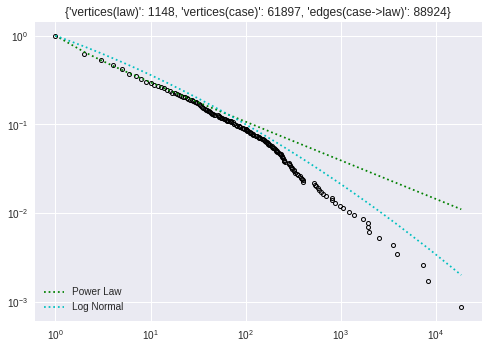

In [0]:
##피인용수 powerlaw 그래프
figrcaseCount = rcaseCount.plot_ccdf(linestyle='', marker='o', ms=4, mec='black', mfc='none', mew=1)
rcaseCount.power_law.plot_ccdf(ax=figrcaseCount, color='g', linestyle=':',label='Power Law')
rcaseCount.lognormal.plot_ccdf(ax=figrcaseCount, color='c', linestyle=':',label='Log Normal')
#rcaseCount.truncated_power_law.plot_ccdf(ax=figrcaseCount, color='b', linestyle=':',label='Truncated Power Law')

plt.title( str(dataset) )
plt.legend(loc='lower left')
plt.show()

In [0]:
#대법원 판례가 인용한 개별법(상위 20개)
caseRefCount[:21]

,nameOflaw,refcount
0,민법,18524
1,민사소송법,8352
2,형법,7394
3,형사소송법,3955
4,행정소송법,3511
5,상법,2517
6,헌법,2003
7,상표법,1932
8,근로기준법,1914
9,소득세법,1718
